# Lets get some exploratory plots

## First Load data

In [4]:
import numpy as np
import pandas as pd
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event
import matplotlib.pyplot as plt

In [5]:
hits, cells, particles, truth = load_event('./training_data/event000001000')

In [6]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1
5,6,-57.068699,-8.177770,-1502.5,7,2,1
6,7,-73.872299,-2.578900,-1502.5,7,2,1
7,8,-63.853500,-10.868400,-1502.5,7,2,1
8,9,-97.254799,-10.889100,-1502.5,7,2,1
9,10,-90.292900,-3.269370,-1502.5,7,2,1


##### Get a numpy array of x,y,z coordinates per hit

In [7]:
hits_xyz = hits.values[:,1:4]

##### Plot all hits in the event in the zx plane

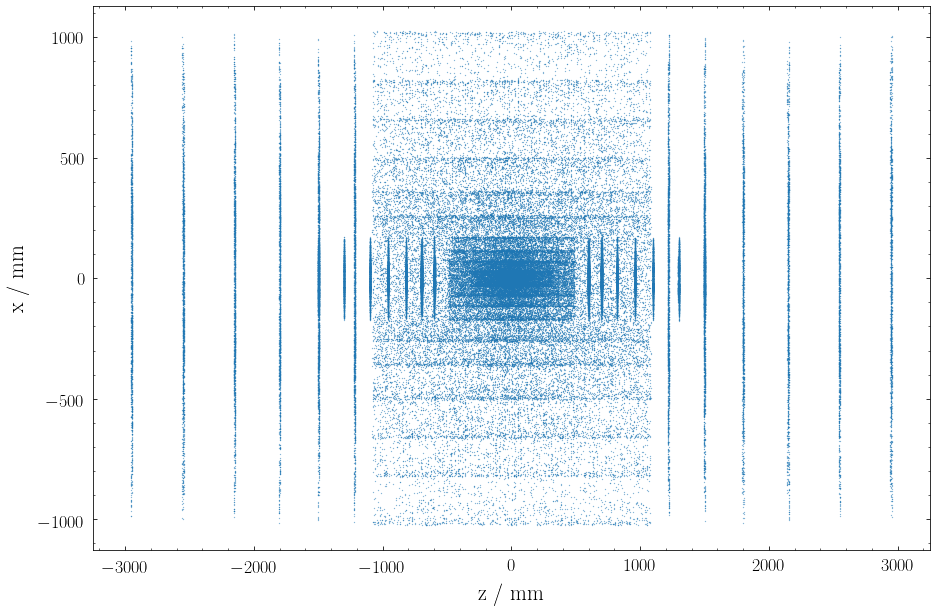

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(hits_xyz[:,2],hits_xyz[:,0],s=0.05)
plt.xlabel("z / mm")
plt.ylabel("x / mm")

##### Plot again in the xy plane

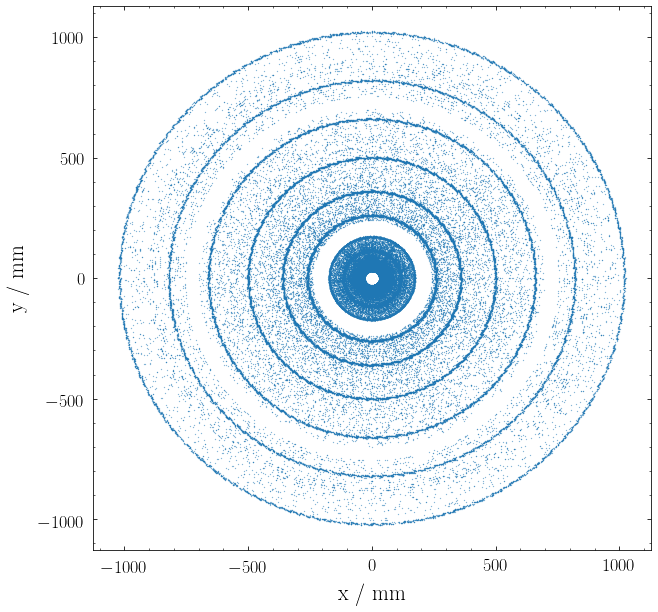

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(hits_xyz[:,0],hits_xyz[:,1],s=0.05)
plt.xlabel("x / mm")
plt.ylabel("y / mm")

## Now lets look at the truth tracks

In [11]:
truth

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.000000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.492200,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.000000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.702320,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.573180,0.000009
5,6,108087696726949888,-57.085602,-8.189710,-1502.5,-0.401129,-0.035276,-10.466900,0.000008
6,7,968286151951515648,-73.860802,-2.575860,-1502.5,-0.442662,-0.036969,-9.130100,0.000007
7,8,954766419537428480,-63.851200,-10.875400,-1502.5,-0.670459,-0.092609,-15.540700,0.000011
8,9,707072769359085568,-97.248901,-10.906700,-1502.5,-0.279789,-0.062143,-4.412920,0.000008
9,10,67554956483231744,-90.276299,-3.243970,-1502.5,-0.251752,-0.037138,-4.249220,0.000006


In [12]:
truth.values[1,1]

2.252576343772365e+16

### I want to separate hits into groups according to which track they are assigned to.

In [14]:
#This is a list of the unique track ids
track_unique_ids = np.unique(truth.values[:,1])

In [18]:
track_unique_ids

array([0.00000000e+00, 4.50366835e+15, 4.50373707e+15, ...,
       9.68306149e+17, 9.68306218e+17, 9.68307936e+17])

In [19]:
#trackhitslist is a list.
#The nth entry in this list, is itself a list of the hit_ids corresponding to the nth truth-level track.
trackhitslist = [truth.values[truth.values[:,1] == track_unique_id,0] for track_unique_id in track_unique_ids[:100]]

#track_hits_list_xyz is a list, where each entry corresponds to a track.
#For each track, there is a list corresponding to the hits in that track.
#For each hit, there is a 3-vector of x,y,z coordinates.
track_hits_list_xyz = [hits_xyz[hits.astype(int)-1] for hits in  trackhitslist]

#### Now that I have done that, lets plot some tracks. The gray points will be hits assigned to particle id 0, and the coloured ones will correspond to constructed tracks.

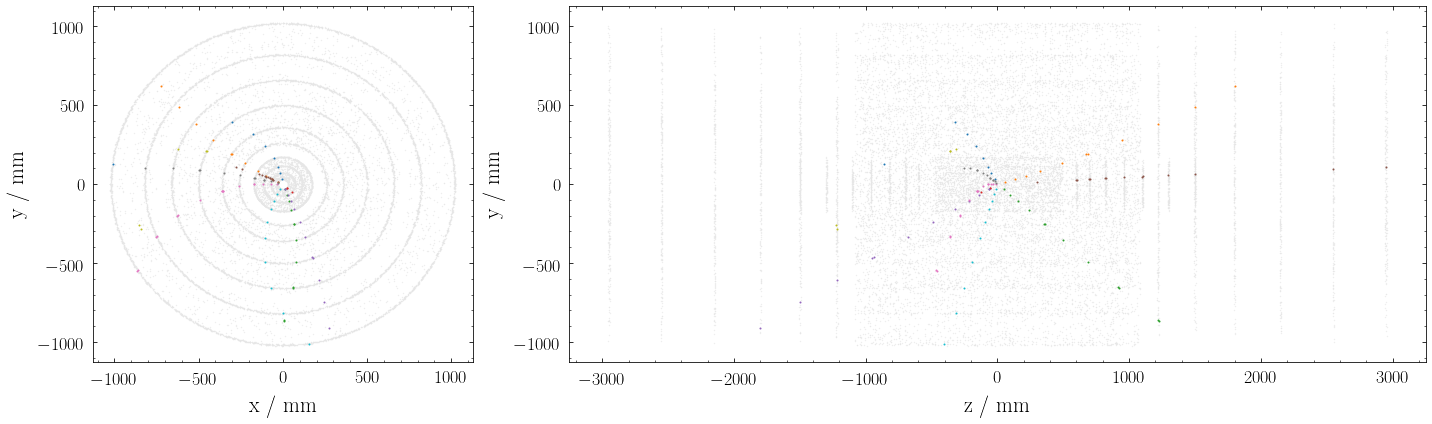

In [38]:
numtracks = 11
plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((1,3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((1,3), (0, 1), colspan=2)
colors = ['0.9']
sizes = [0.1]
for i in range(numtracks):
    colors.append('C' + str(i))
    sizes.append(1)
for i in range(numtracks):
    ax1.scatter(track_hits_list_xyz[i][:,0],track_hits_list_xyz[i][:,1],s=sizes[i],color=colors[i])
    ax2.scatter(track_hits_list_xyz[i][:,2],track_hits_list_xyz[i][:,1],s=sizes[i],color=colors[i])
    
ax1.set_ylabel("y / mm")
ax1.set_xlabel("x / mm")
ax2.set_ylabel("y / mm")
ax2.set_xlabel("z / mm")
plt.tight_layout()
plt.show()

#### Now rotate (switch x and y)

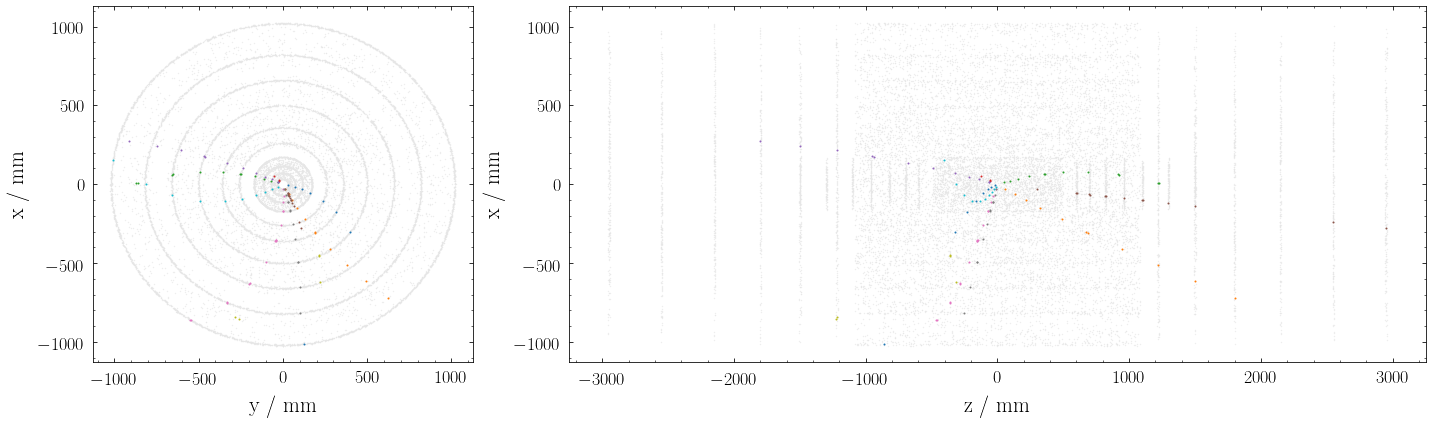

In [40]:
numtracks = 11
plt.figure(figsize=(20,6))
ax1 = plt.subplot2grid((1,3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((1,3), (0, 1), colspan=2)
colors = ['0.9']
sizes = [0.1]
for i in range(numtracks):
    colors.append('C' + str(i))
    sizes.append(1)
for i in range(numtracks):
    ax1.scatter(track_hits_list_xyz[i][:,1],track_hits_list_xyz[i][:,0],s=sizes[i],color=colors[i])
    ax2.scatter(track_hits_list_xyz[i][:,2],track_hits_list_xyz[i][:,0],s=sizes[i],color=colors[i])
    
ax1.set_ylabel("x / mm")
ax1.set_xlabel("y / mm")
ax2.set_ylabel("x / mm")
ax2.set_xlabel("z / mm")
plt.tight_layout()
plt.show()

## I want to look more closely at the detector geometry, so here are some closeups

In the plots below, I see the overlapping modules in the circles. I also see two 'layers' of modules on each layer. This is a trick of the projection. The two layers are overlapping sets of modules along the z-direction. So about 10% of the time a track will pass through two modules which overlap along their edghes in the same layer, and about 1% of the time it will pass through four modules which overlap at the corner

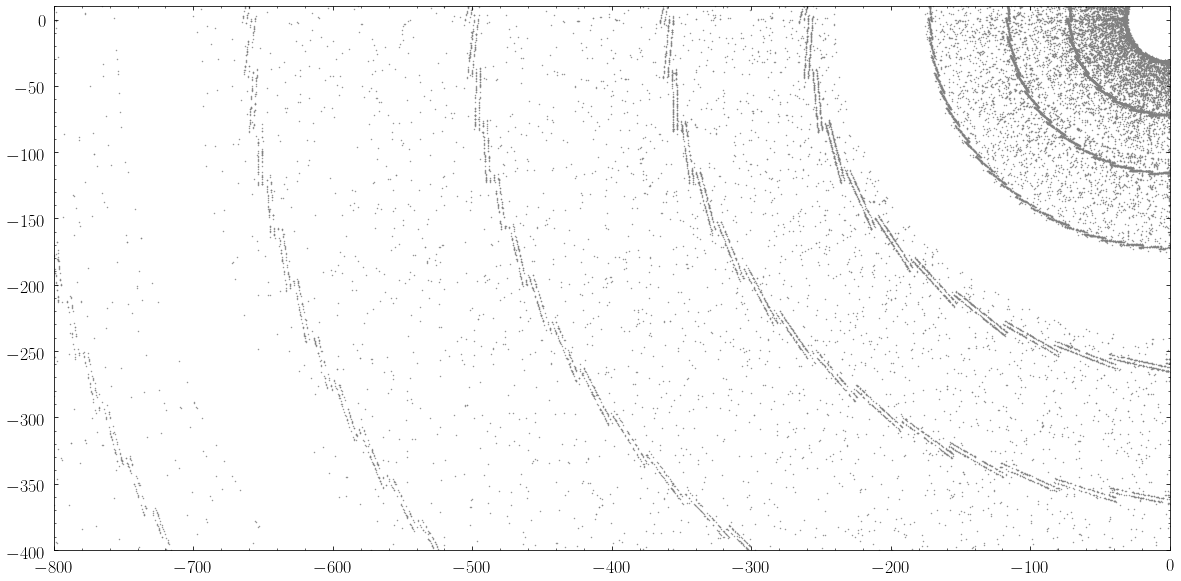

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(hits_xyz[:,0],hits_xyz[:,1],s=0.2,color='0.5')
plt.xlim([-800,0])
plt.ylim([-400,10])
plt.show()

Zoom in to the inner layers:

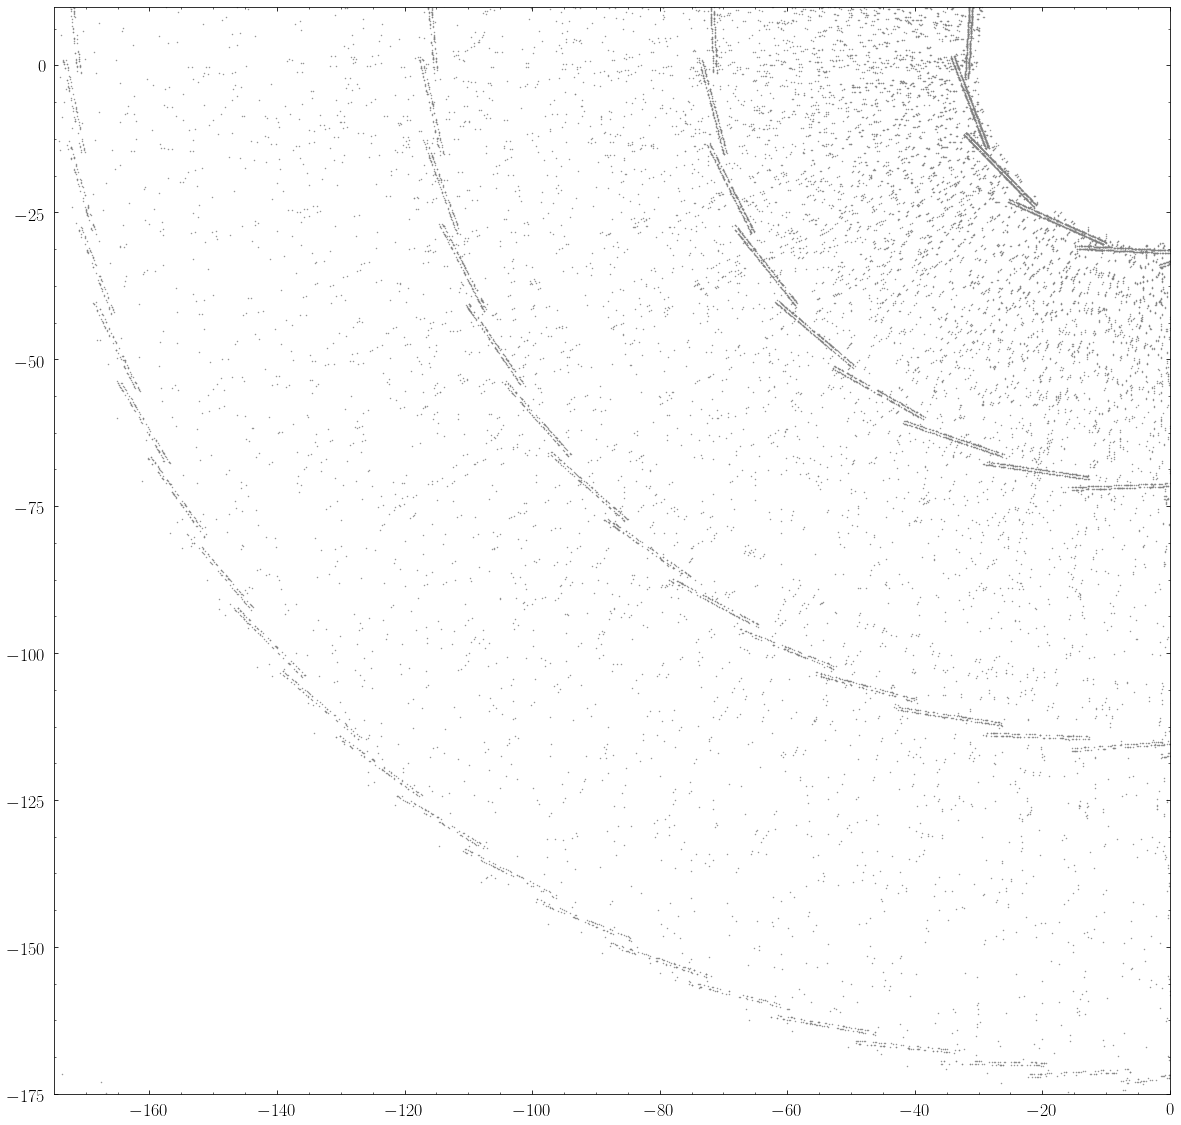

In [50]:
plt.figure(figsize=(20,20))
plt.scatter(hits_xyz[:,0],hits_xyz[:,1],s=0.2,color='0.5')
plt.xlim([-175,0])
plt.ylim([-175,10])
plt.show()

## Multiple hits per layer

I noticed that sometimes a track leaves multiple hits in a layer. The following plots illustrate it. This particular track (index 7, where the index starts with 0, so it is the eighth track) leaves at least one hit in every layer. In the fourth layer it leaves two hits. In the sixth layer it leaves four hits. Multiple hits in a layer happens because each layer consists of overlapping modules. There seems to be two overlapping edges covering ~10% of the area, and therefore four overlapping corners covering ~1% of the area. In the first plot below, we see a quadruple hit at around (-350, -50).

In both of these plots, the gray points are just the x,y coordinates of all hits in the first event, which gives a picture of the projection of the detector geometry in the x,y plane. The red points are the points associated with one track.

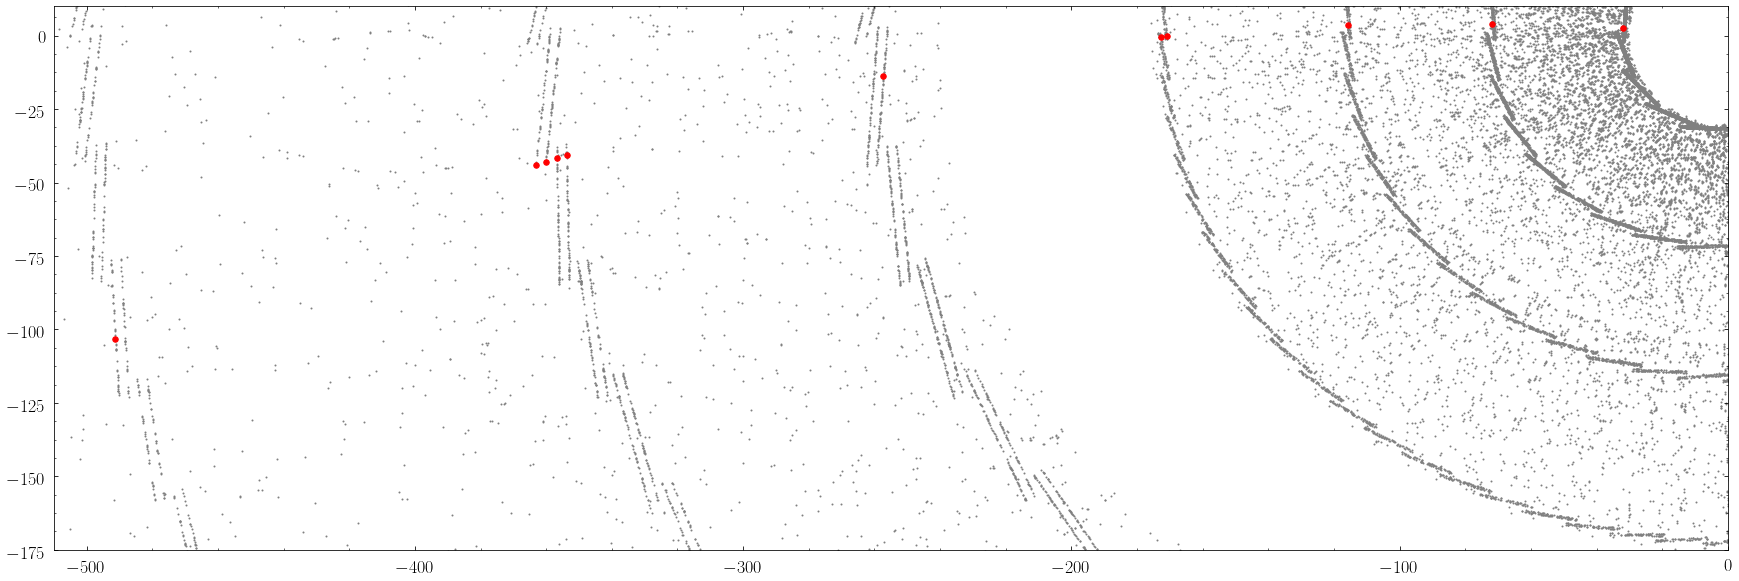

In [77]:
tracknum = 7
plt.figure(figsize=(30,10))
colors = ['0.9']
sizes = [0.1]
for i in range(numtracks):
    colors.append('C' + str(i))
    sizes.append(5)
plt.scatter(hits_xyz[:,0],hits_xyz[:,1],s=1,color='0.5')
plt.scatter(track_hits_list_xyz[tracknum][:,0],track_hits_list_xyz[tracknum][:,1],s=30,color='red')
plt.xlim([-510,0])
plt.ylim([-175,10])
plt.show()

There is also a double hit that you can just about see on the fourth layer, (-160, 0). Below we zoom in on that.

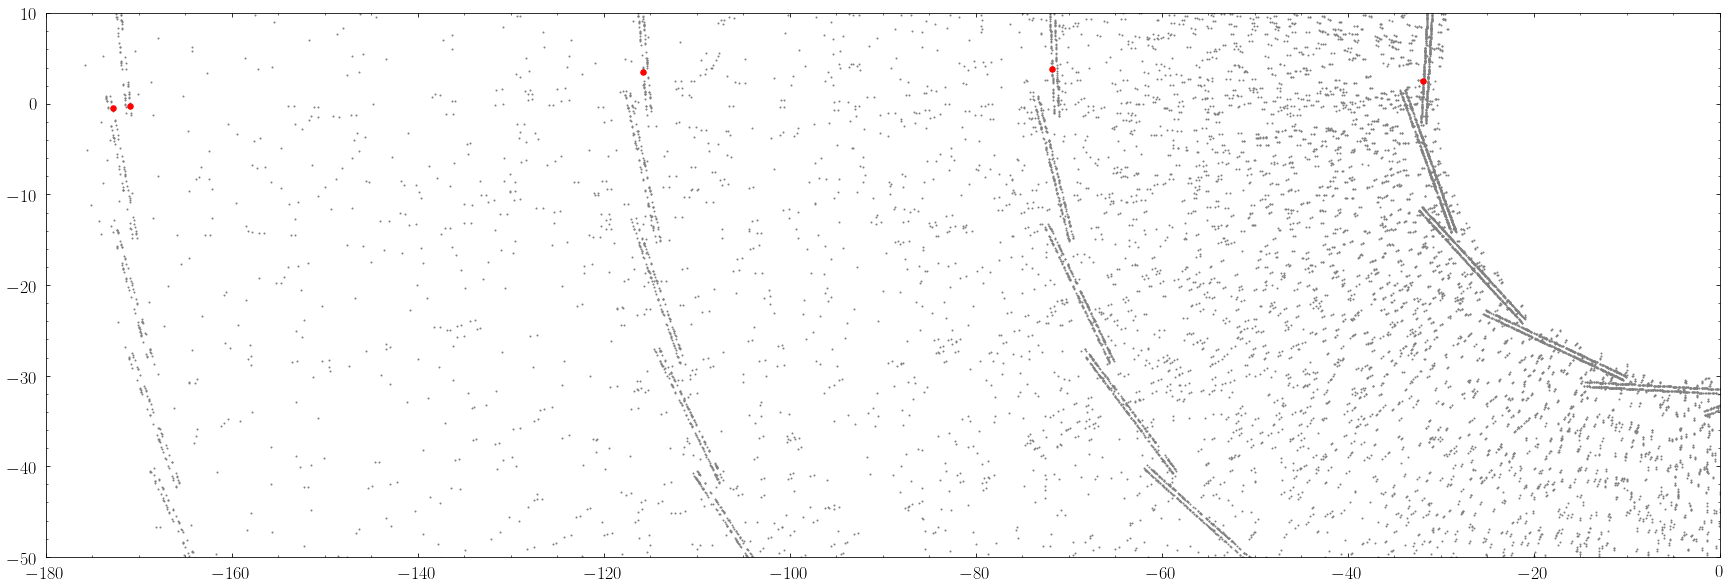

In [79]:
tracknum = 7
plt.figure(figsize=(30,10))
colors = ['0.9']
sizes = [0.1]
for i in range(numtracks):
    colors.append('C' + str(i))
    sizes.append(5)
plt.scatter(hits_xyz[:,0],hits_xyz[:,1],s=1,color='0.5')
plt.scatter(track_hits_list_xyz[tracknum][:,0],track_hits_list_xyz[tracknum][:,1],s=30,color='red')
plt.xlim([-180,0])
plt.ylim([-50,10])
plt.show()

### Lets see what the particles look like

In [80]:
particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3
5,4504011944230912,-0.009288,0.009861,-0.077879,0.795277,-1.685200,-3.520890,1,12
6,4504080663707648,-0.009288,0.009861,-0.077879,-0.563433,0.305370,6.167120,-1,14
7,4504355541614592,-0.009288,0.009861,-0.077879,-0.501267,0.049825,-0.213011,-1,17
8,4504424261091328,-0.009288,0.009861,-0.077879,-1.652120,0.453142,-0.533958,-1,12
9,4504492980568064,-0.009288,0.009861,-0.077879,0.035160,0.131420,-0.207544,1,0


## How many hits per module?

I wanted to see what the distribution is for hits per module.

In [32]:
#Get the detector module ID (volume, layer, module) for each hit
hits_ids = hits.values[:,4:]

In [33]:
#For each module, count how many hits there are in that module
num = []
for i, hit in enumerate(hits_ids):
    if i == 0:
        num.append(1)
        continue
    if (hits_ids[i] == hits_ids[i-1]).all():
        num[-1] = num[-1] + 1
    else:
        num.append(1)

In [31]:
(hits_ids[0] == hits_ids[1]).all()

True

#### Plot Number of hits per module

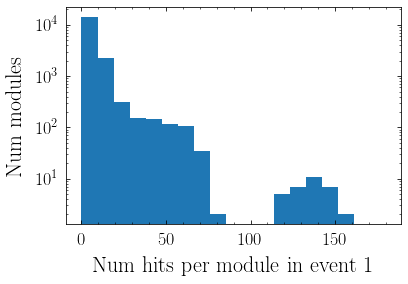

In [139]:
#plt.hist(num,bins = np.logspace(0,np.log10(300),20))
plt.hist(num,bins = np.linspace(0,180,20))
plt.semilogy()
#plt.semilogx()
plt.yscale("log", nonposy='clip')
plt.xlabel("Num hits per module in event 1")
plt.ylabel("Num modules")
plt.show()

There seem to be different populations. It would be interesting to split this by detector volume.